In [39]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot_date
import datetime as dt
from datetime import datetime



In [2]:
# Make a date parsing function with the correct format
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M')

# Read the CSV while parsing the dates
df23 = pd.read_csv("913023.csv", parse_dates=['DATE'], date_parser=dateparse)


/home/apurva/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8,10,11,12,13,14,15,16,17,19,20,22,23,25,26,27,28,29,33,34,37,38,39,40,44,45,46,47,48,50,59,60,62,63,64,67,68,69,71,72,73,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


datetime64[ns]
object


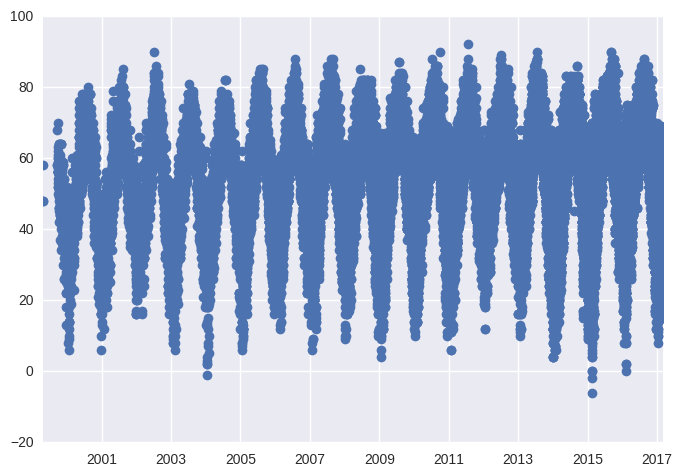

In [40]:
# Data type for dates is datetime64, which matplotlib won't plot :<
print(df23['DATE'].dtype)

# Convert type to datetime so matplotlib will be happy
a=df23.DATE.astype(datetime)
print(a.dtype)

# Turn all non-numerical values into NaN for columns that should be numbers (via coerce) 
numerical_columns = ['DAILYAverageDryBulbTemp']
df23 = (df23.drop(numerical_columns, axis=1).join(df23[numerical_columns].apply(pd.to_numeric, errors='coerce')))

df23 = df23[df23[numerical_columns].notnull().all(axis=1)]

temp = df23.DAILYAverageDryBulbTemp

temp.dropna()



#now can be plotted- what an informative graph!
plot_date(a, temp)
plt.show()



In [34]:
#Possible start to binning? Not sure how we want to go about this

delta = dt.timedelta(hours=730)


df23['MONTH'] = [i.month for i in df23.DATE]
#daily_mean = df23[df23.DAY[0:30]].mean()

print (df23.MONTH)

24948      4
29054      9
29355      9
29409      9
29441      9
29477     10
29504     10
29536     10
29570     10
29598     10
29672     10
29709     10
29741     10
29767     10
29802     10
29841     10
29878     10
29915     10
29943     10
29978     10
30006     10
30033     10
30062     10
30095     10
30173     10
30211     10
30243     10
30278     10
30306     10
30333     10
          ..
954225     2
954226     2
954250     2
954280     2
954281     2
954315     2
954340     2
954371     2
954397     2
954427     2
954452     2
954476     2
954504     2
954529     2
954553     2
954577     2
954601     2
954631     2
954632     2
954658     2
954659     2
954683     3
954684     3
954708     3
954732     3
954757     3
954781     3
954806     3
954830     3
954854     3
Name: MONTH, dtype: int64


In [ ]:
# We obviously want to select by location...

logan = "WBAN:14739"
seatac = "WBAN:24233"

select_logan = df23[df23.STATION == logan]